In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Pixel sorting

### Read in an Image

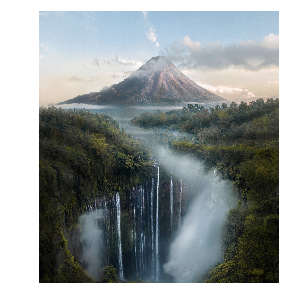

In [2]:
img = cv2.imread(r'../local_files/images/jungle.png')

# convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.axis('off')

# show original image
plt.imshow(img)

### Speeding it up with Numpy

In [3]:
def np_pixel_sort(img, min_b, max_b, direction):
    rotations = {
        'right': 0,
        'down': 1,
        'left': 2,
        'up': 3
    }
    img = np.rot90(img, rotations[direction])
    weights = [.33, .50, .16]
    flat_img = img.reshape(-1,3)                                    # flatten image
    brights = np.sum((flat_img * weights), axis=1)                  # get brightness using weights
    to_split = np.where((brights > max_b) | (brights < min_b))[0]   # split img on light/dark pixels
    flat_splits = np.split(flat_img, to_split)                      # split flat img on brightness
    splits = np.split(brights, to_split)                            # split original img on brightness
    frames = [flat_splits[sub][splits[sub].argsort()]               # sort 1 arr by the other
              for sub in range(len(splits))]
    img = np.concatenate(frames, axis=0).reshape(img.shape)
    return np.rot90(img, -rotations[direction])

CPU times: user 4.09 s, sys: 168 ms, total: 4.26 s
Wall time: 4.26 s


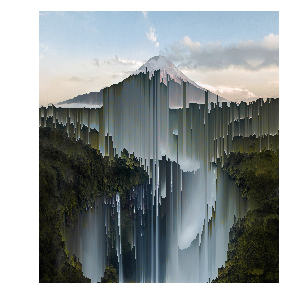

In [4]:
%%time

out = np_pixel_sort(img=img, min_b=35, max_b=175, direction='down')

plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(out)

#### Todo:

In [5]:
# sorts entire image only
def sort_all(img):
    flat_img = img.reshape(-1,3)
    weights = [.33, .50, .16]
    pos_sorted = np.sum((flat_img * weights), axis=1).argsort()
    return flat_img[pos_sorted,:].reshape(img.shape)